In [1]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import lightgbm as lgbm
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
n_elec_merge = pd.read_csv('n_elec_merge.csv')
n_elec_merge = n_elec_merge.drop(['YEAR'], axis=1)

##  For Scaling

In [3]:
n_elec_X = n_elec_merge.drop(['n_elec'], axis=1)
n_elec_Y = n_elec_merge[['n_elec']]

scaler_n_elec = MinMaxScaler()
scaler_n_elec.fit(n_elec_X)
scaled_n_elec_X = scaler_n_elec.transform(n_elec_X)

new_n_elec_X = pd.DataFrame(scaled_n_elec_X, index=n_elec_X.index, columns=n_elec_X.columns)
new_n_elec = pd.concat([new_n_elec_X, n_elec_Y], axis=1)

new_n_elec = new_n_elec.iloc[:4724]

In [4]:
input = new_n_elec.iloc[:-1,]
target = new_n_elec[['n_elec']].iloc[1:]

trainX_n_elec, testX_n_elec, trainY_n_elec, testY_n_elec = train_test_split(input,target,test_size=0.3,shuffle=False,random_state=0)

## SVR

In [5]:
model_svr_n_elec = SVR(kernel='rbf', gamma='auto')
model_svr_n_elec.fit(trainX_n_elec, trainY_n_elec)

c:\Users\yunjae\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma='auto')

In [6]:
model_svr_pred_n_elec = model_svr_n_elec.predict(testX_n_elec)
model_svr_preds_n_elec = np.reshape(model_svr_pred_n_elec,(-1,1))
svr_n_elec_actual = testY_n_elec.to_numpy()
svr_n_elec_actual = np.reshape(svr_n_elec_actual,(-1,1))

In [7]:
from sklearn.metrics import mean_absolute_error
print('mean_absolute_error : ', mean_absolute_error(svr_n_elec_actual, model_svr_preds_n_elec))                                      

from sklearn.metrics import mean_squared_error
print('mean_squared_error : ', mean_squared_error(svr_n_elec_actual, model_svr_preds_n_elec))

from sklearn.metrics import r2_score   # model.score
print('r2_score : ', r2_score(svr_n_elec_actual, model_svr_preds_n_elec))

mean_absolute_error :  0.13206492845252849
mean_squared_error :  0.03476821511955678
r2_score :  0.902541360679395


## XGBoost

In [8]:
xgb_model_n_elec = xgb.XGBRegressor(n_estimators=200, learning_rate=0.01)

In [9]:
xgb_model_n_elec.fit(trainX_n_elec, trainY_n_elec)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [10]:
xgb_model_pred_n_elec = xgb_model_n_elec.predict(testX_n_elec)
xgb_model_preds_n_elec = np.reshape(xgb_model_pred_n_elec,(-1,1))
xgb_n_elec_actual = testY_n_elec.to_numpy()
xgb_n_elec_actual = np.reshape(xgb_n_elec_actual,(-1,1))

In [11]:
from sklearn.metrics import mean_absolute_error
print('mean_absolute_error : ', mean_absolute_error(xgb_n_elec_actual, xgb_model_preds_n_elec))                                      

from sklearn.metrics import mean_squared_error
print('mean_squared_error : ', mean_squared_error(xgb_n_elec_actual, xgb_model_preds_n_elec))

from sklearn.metrics import r2_score   # model.score
print('r2_score : ', r2_score(xgb_n_elec_actual, xgb_model_preds_n_elec))

mean_absolute_error :  0.702205630566389
mean_squared_error :  0.5262846385820208
r2_score :  -0.4752262834076115


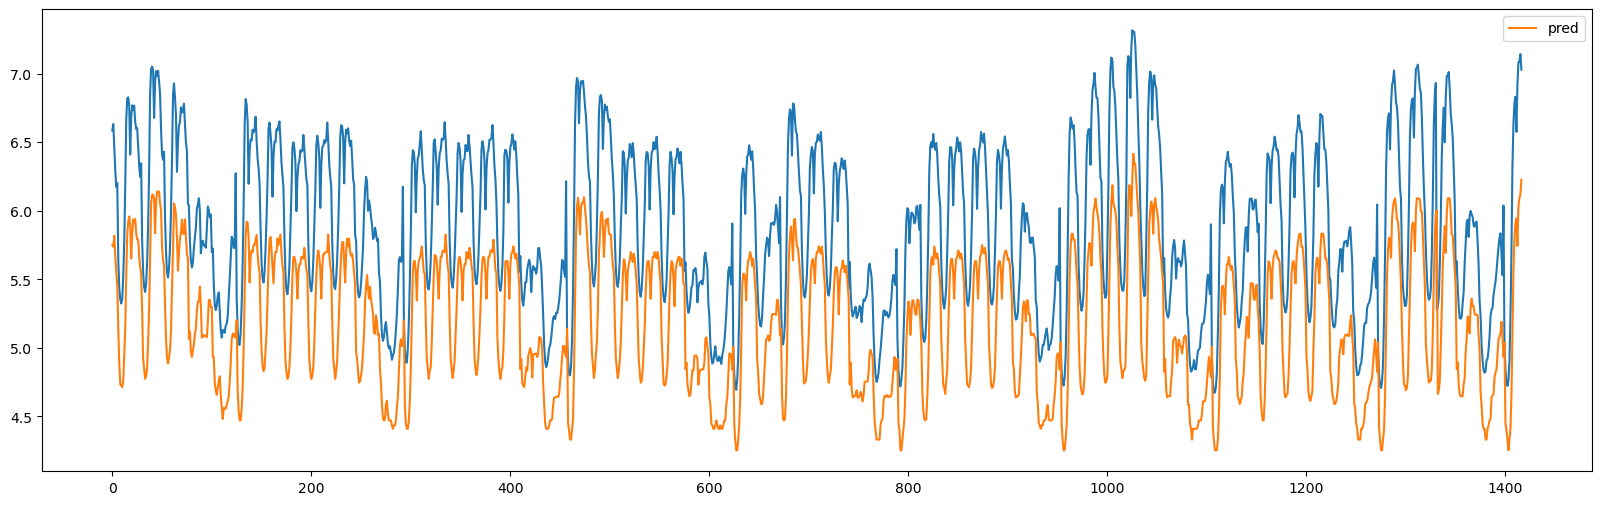

In [15]:
plt.figure(figsize=(20,6))
plt.plot(xgb_n_elec_actual)
plt.plot(xgb_model_preds_n_elec, label='pred')
plt.legend()
plt.show()

## LightGBM

In [16]:
model3= LGBMRegressor(
    learning_rate=0.01
    , n_estimators=200
)

lgbm_model_n_elec = model3.fit(trainX_n_elec, trainY_n_elec, eval_metric='mae', verbose=0)

c:\Users\yunjae\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [17]:
lgbm_model_pred_n_elec = lgbm_model_n_elec.predict(testX_n_elec)
lgbm_model_preds_n_elec = np.reshape(lgbm_model_pred_n_elec,(-1,1))
lgbm_n_elec_actual = testY_n_elec.to_numpy()
lgbm_n_elec_actual = np.reshape(lgbm_n_elec_actual,(-1,1))

In [18]:
from sklearn.metrics import mean_absolute_error
print('mean_absolute_error : ', mean_absolute_error(lgbm_n_elec_actual, lgbm_model_preds_n_elec))                                      

from sklearn.metrics import mean_squared_error
print('mean_squared_error : ', mean_squared_error(lgbm_n_elec_actual, lgbm_model_preds_n_elec))

from sklearn.metrics import r2_score   # model.score
print('r2_score : ', r2_score(lgbm_n_elec_actual, lgbm_model_preds_n_elec))

mean_absolute_error :  0.17346349076700232
mean_squared_error :  0.047707747962950076
r2_score :  0.8662706099369433


## Random Forest

In [19]:
rf_n_elec = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)

rf_n_elec.fit(trainX_n_elec, trainY_n_elec)

C:\Users\yunjae\AppData\Local\Temp\ipykernel_29568\294301958.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_n_elec.fit(trainX_n_elec, trainY_n_elec)


RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [20]:
n_elec_predict = rf_n_elec.predict(testX_n_elec)

n_elec_actual = testY_n_elec

In [21]:
from sklearn.metrics import mean_absolute_error
print('mean_absolute_error : ', mean_absolute_error(n_elec_actual, n_elec_predict))                                      

from sklearn.metrics import mean_squared_error
print('mean_squared_error : ', mean_squared_error(n_elec_actual, n_elec_predict))

from sklearn.metrics import r2_score   # model.score
print('r2_score : ', r2_score(n_elec_actual, n_elec_predict))

mean_absolute_error :  0.13324707919103213
mean_squared_error :  0.034765589967327364
r2_score :  0.9025487192327004
